In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy.stats import binom




A continuación se enuncian dos teoremas muy importantes en la teoría de probabilidad. Iniciemos con algunas desigualdades:

### Desigualdad de Markov
Sea $X \geq 0$ una variable aleatoria con esperanza finita. Para $\epsilon > 0$ se cumple que $$P(X\geq \epsilon) \leq \frac{E(X)}{\epsilon}$$

Ejemplo:

1. Sea una variable aleatoria binomial con parámetros $(n,.5)$ (número de ensayos, probabilidad), y sea $\epsilon = \frac{3n}{4}$ $$P(X\geq \frac{3n}{4}) \leq \frac{.5n}{\frac{3n}{4}}=\frac{2n}{3n}=\frac{2}{3}$$

Es decir, la probabilidad de que la variable con distribución binomial exceda $\frac{3n}{4}$ está acotada superiormente por $\frac{2}{3}$

Veamos gráficamente y numéricamente:

In [171]:
data_binomial = binom.rvs(n=10,p=.5, size=10)


[Text(0.5, 0, 'Distribución binomial'), Text(0, 0.5, 'Frecuencia')]

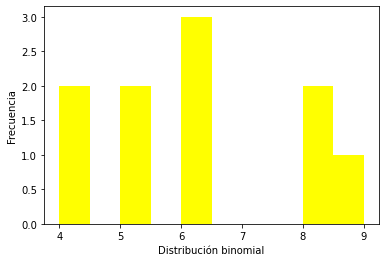

In [172]:
ax = sns.distplot(data_binomial,
                  kde=False,
                  bins=10,
                  color='yellow',
                  hist_kws={"linewidth": 10,'alpha':1})
ax.set(xlabel='Distribución binomial', ylabel='Frecuencia')




Sea $n=10$, entonces $\epsilon=\frac{15}{2}$, $$P(X\geq \frac{15}{2}) = .0.0546875
\leq \frac{.5(10)}{\frac{15}{2}}=\frac{10}{15}=\frac{2}{3}$$


In [183]:
1-binom(10,.5).cdf(7.5)

0.0546875

Ahora el código:

In [202]:
def imarkov(epsilon,Ex):
    print("La cota superior es")
    return Ex/epsilon



In [203]:
imarkov(15/2,5)

La cota superior es


0.6666666666666666

### Desigualdad de Chebyshev
Sea $X$ una variable aleatoria con media $\mu$ y varianza finita $\sigma^2$, se tiene que para cualquier $\epsilon>0 $ $$P(|X-\mu|\geq\epsilon) \leq \frac{\sigma^2}{\epsilon^2}$$

Ejemplo:

2. Sea una variable aleatoria con distribución binomial con parámetros $(n,.5)$ (número de ensayos, probabilidad), y sea $\epsilon= n(\alpha-p)$ con $\alpha=\frac{3}{4}$. Se tiene que $$P(|X-n(.5)|\geq n(\alpha-p)) \leq \frac{np(1-p)}{n^2(\alpha-p)^2}=\frac{p(1-p)}{n(\alpha-p)^2}$$

$$P(|X-.5n|\geq \frac{n}{4}) \leq \frac{\frac{n}{4}}{\frac{n^2}{16}}=\frac{16n}{4n^2}=\frac{4}{n}$$

Es decir, esta desigualdad indica que hay una cota superior para la diferencia entre la variable aleatoria y su media.

Veamos gráficamente y numéricamente:

$$P(|X-10|\geq \frac{20}{4}) \leq \frac{\frac{20}{4}}{\frac{20^2}{16}}=\frac{16(20)}{1600}=\frac{320}{1600}=\frac{1}{5}$$

$$P(X\leq 5) +P(X\geq 15) \leq \frac{\frac{20}{4}}{\frac{20^2}{16}}=\frac{16(20)}{1600}=\frac{320}{1600}=\frac{1}{5}$$



In [207]:
data_binomial=binom.rvs(n=20,p=.5,size=20)

[Text(0.5, 0, 'Distribución binomial'), Text(0, 0.5, 'Frecuencia')]

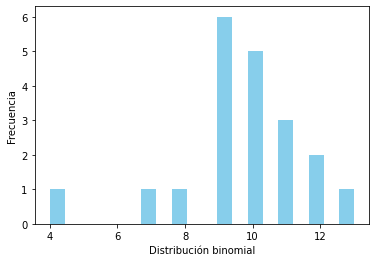

In [209]:
ax = sns.distplot(data_binomial,
                  kde=False,
                  bins=20,
                  color='skyblue',
                  hist_kws={"linewidth": 10,'alpha':1})
ax.set(xlabel='Distribución binomial', ylabel='Frecuencia')


In [221]:
binom(20,.5).cdf(5)+(1-binom(20,.5).cdf(15))

0.02660369873046875

Se cumple que $0.0266<.20$. Entonces la diferencia entre la variable aleatoria y su media tiene como mínimo una cota superior de $\frac{1}{5}$.

In [2]:
def ichebyshev(varianza,epsilon):
    print("La cota superior es")
    return varianza/epsilon

In [4]:
ichebyshev(5,25)

La cota superior es


0.2

###  Desigualdad de Kolmogorov

Sean $X_{1}, \dots X_{n}$ variables aleatorias independientes con $E(X_{i})=0$ y $Var(X_{i})< \infty$, para cualquier $\epsilon > 0$ $$P(\max_{k}{|X_{1}+\dots+ X_{k}|}\geq \epsilon) \leq \frac{1}{\epsilon^2}\sum_{k=1}^{n}Var(X_{k})$$

Ejemplo:

3. Sean $X_{1},\dots,X_{10}$ variables aleatorias identicamente distribuidas con distribución Bernoulli $(0)$ y varianza $1$. Entonces $X_{i}$ se distribuye como una binomial $(10,0)$. Sea $\epsilon=1$ $$P(\max_{k}{|X_{k}|}\geq 1)=1-1 \leq \frac{1}{1}\sum_{k=1}^{n}0=0$$

Y se cumple la igualdad en este caso, que quiere decir que la probabilidad de que la suma de variables aleatorias exceda algún número está acotada superiormente por la relación entre la suma de las varianzas dividiendo entre el número superado al cuadrado.

Notar que la desigualdad de Chebyshev es una particularidad de esta porque para $n=1$, se tiene que

$$P(\max_{k}{|X_{k}|}\geq \epsilon) \leq \frac{1}{\epsilon^2}\sum_{k=1}^{1}Var(X_{k})=\frac{\sigma^2}{\epsilon^2}$$

In [33]:
data_binomiall=binom.rvs(n=10,p=0,size=10)

[Text(0.5, 0, 'Distribución binomial'), Text(0, 0.5, 'Frecuencia')]

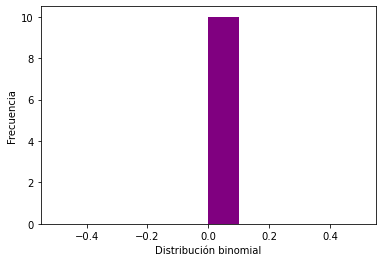

In [34]:
ax = sns.distplot(data_binomiall,
                  kde=False,
                  bins=10,
                  color='purple',
                  hist_kws={"linewidth": 10,'alpha':1})
ax.set(xlabel='Distribución binomial', ylabel='Frecuencia')

Es decir, se espera que los datos estén concentrados en una solo intervalo.

### Cotas de Chernoff
Las desigualdades de Markov y de Chebyshev proporcionan información relevante con respecto a las probabilidades porque ambas dan como resultado cotas superiores, que sirven para tener más información respecto a algún evento. Sin embargo, estas desigualdades no son muy precisas. Para la desigualdad de Markov la cota se mantiene constante sin importar el número de variables aleatorias, la cota funciona, sí, pero da un rango más amplio de imprecisión. En la desigualdad de Chebyshev la cota tiende a $0$ conforme crece el número de variables, lo cual quiere decir que tiene más presición para medir la diferencia entre variables aleatorias y sus medias. 

Las cotas de Chernoff se deducen porque $$P(X\geq a) = P(e^{sX} \geq e^{sa})$$ para $s>0$  
y $$P(X\leq a) = P(e^{sX} \geq e^{sx})$$ para $s>0$.  La variable $e^{sX}$ es positiva por lo que se puede aplicar la desigualdad de Markov: $$P(X\geq a)=P(e^{sX}\geq e^{sa})\leq \frac{E(e^{sX})}{e^{sa}}=\frac{M_{X}(s)}{e^{sa}}$$
mientras que para $s<0$, $$P(X\leq a)=P(e^{sX}\geq e^{sa})\leq \frac{E(e^{sX})}{e^{sa}}=\frac{M_{X}(s)}{e^{sa}}$$, en donde $M_{x}(s)$ es la función generadora de momentos.
Para encontrar la mejor cota superior, utilizamos la mínima cota superior, teniendo 
$$P(X\geq a)\leq \min_{s>0}\frac{M_{X}(s)}{e^{sa}}$$
$$P(X\leq a)\leq \min_{s<0}\frac{M_{X}(s)}{e^{sa}}$$

Ejemplo: 

4. Sea $X$ una variable aleatoria con distribución binomial $(n,.5)$ y $\alpha = \frac{3}{4}$. $M_{X}(s)=(pe^s+q)^n$, $q=1-p$. Para la cota considerando $\alpha n$ $$P(X\geq n\alpha)\leq \min_{s>0}\frac{M_{X}(s)}{e^{s\alpha}}=\min_{s>0}\frac{(pe^s+q)^n}{e^{s\alpha}}$$
Para encontar la mínima $s$ se deriva: $$\frac{d}{ds}\frac{(pe^s+q)^n}{e^{s\alpha}}$$  $$
e^s=\frac{\alpha q}{np(1-\alpha)}$$
 Y sustituyendo en la desigualdad $$P(X\geq n\alpha)\leq (\frac{1-p}{1-\alpha})^{(1-\alpha )n}(\frac{p}{\alpha})^{\alpha n} $$
 
 Sea $n=1$, $p=.7$ y $\alpha=.80$
 $$P(X\geq \frac{4}{5})\leq (\frac{1-.7}{1-\frac{4}{5}})^{(1-\frac{4}{5})}(\frac{.7}{\frac{4}{5}})^{\frac{4}{5}} = \frac{.3}{.2}^{.2} (.875)^{.8}=.9745 $$
 
 Para $n=10$
 $$P(X\geq 8)\leq (\frac{1-.7}{1-\frac{4}{5}})^{2}(\frac{.7}{\frac{4}{5}})^{8} = \frac{.3}{.2}^{2} (.875)^{8}=.7731 $$
 
 Para $n=100$
  $$P(X\geq 80)\leq (\frac{1-.7}{1-\frac{4}{5}})^{20}(\frac{.7}{\frac{4}{5}})^{80} = \frac{.3}{.2}^{20} (.875)^{80}=.0762 $$
 
 Entonces, entre mayor número de variables aleatorias se tengan habrá mejor aproximación para la cota superior porque a diferencia de las desigualdades anteriores esta decrece exponencialmente.

### Convergencia y ley de los grandes números 

Bajo ciertas condiciones el promedio de variables aleatorias converge a una constante cuando el número de variables tiende a infinito. *La ley debil de los grandes números* converge en probabilidad; *la ley fuerte de los grandes números* converge casi seguramente. La ley fuerte implica la ley debil. Repasemos conceptos de convergencia de variables aleatorias:

#### Convergencia puntual
La sucesión de variables aleatorias $X_{1}, \dots$ converge *puntualmente* a  la variable $X$ si para cada $w$ en $\Omega$
$$\lim _{n \to \infty} X_{n}(w)= X(w) $$

Entonces esta convergencia existe cuando se considera una sucesión de variables aleatorias, por ejemplo $X_{n}(w)=w^n$, y convergen a un número sin importar la $w$ pero aproximando a $\infty$ cada $w$. El dominio de esta sucesión es un espacio medible, por ejemplo, $([0,1], \mathcal{B}[0,1])$. La $w$ está entre $[0,1]$, es decir, la sucesión converge a $0$ si $w \in [0,1)$, pero cuando $w=1$, $X(w)=1$. Y se obtiene la variable a la que converge la sucesión considerando el espacio medible.

#### Convergencia casi segura
La sucesión de variables aleatorias $X_{1}, \dots$ converge *casi seguramente* a  la variable $X$ si para cada $w$ en $\Omega$
$$P(\lim _{n \to \infty} X_{n}(w)= X(w))=1 $$

En la convergencia puntual todos los elementos de $\Omega$ tenían que converger a un valor. En la convergencia casi segura se puede tener un subconjunto que no converja a la variable aleatoria, pero con probabilidad cero. Entonces se converge *casi* para todos los $w$.

Por ejemplo, sea el espacio de probabilidad $([0,1],\mathcal{B}[0,1], \lambda)$ con la sucesión $X_{n}(w)=\mathbb{1}_{[0,\frac{1}{n}]}(w)$. La sucesión se distribuye como una bernoulli$(\frac{1}{n})$ porque toma el valor $0$ o toma el valor $1$. $P(\lim _{n \to \infty} \mathbb{1}_{[0,\frac{1}{n}]}(w)= X(w))=1 $. Para encontrar $X(w)$ se tiene que ver que $\lim _{n \to \infty} \mathbb{1}_{[0,\frac{1}{n}]}(w)=0$ para cada $w$, excepto cuando $w=0$ porque si toma el valor de $0$ ya no está en la función indicadora. Entonces $X_{n}(w)$ converge casi seguramente a $0$ porque *casi* converge en todo el espacio muestral, salvo en $0$, como se vio anteriormente.

#### Convergencia en probabilidad
La sucesión de variables aleatorias $X_{1}, \dots$ converge *en probabilidad* a  la variable $X$ si para cada $\epsilon > 0$ 
$$\lim _{n \to \infty} P(w\in \Omega: | X_{n}(w)-X(w)|> \epsilon)=0 $$

Resulta de utilidad la desigualdad de Chebyshev para probar este tipo de convergencia porque la cota superior que tiende a $0$ sería su equivalente.

#### Convergencia en media
La sucesión de variables aleatorias $X_{1}, \dots$ converge *en media* a  la variable aleatoria integrable $X$ si 
$$\lim _{n \to \infty} E| X_{n}(w)-X(w)|=0 $$

A este tipo de convergencia también se le llama *convergencia en* $L^1$ y sirve para medir distancias entre dos variables aleatorias.

#### Convergencia en media cuadrática
La sucesión de variables aleatorias $X_{1}, \dots$ converge *en media cuadrática* a  la variable aleatoria integrable $X$ si 
$$\lim _{n \to \infty} E| X_{n}(w)-X(w)|^2=0 $$

Se le conoce también como *convergencia en* $L^2$. Se supone que las variables tienen segundo momento, por lo que se les exige más que en convergencia en media. Se deduce que convergencia en media cuadrática implica convergencia en media.

#### Convergencia en $L^k$ 
La sucesión de variables aleatorias $X_{1}, \dots$ converge *en* $L^k$ a  la variable aleatoria integrable $X$ si para cada $k \geq 1$
$$\lim _{n \to \infty} E| X_{n}(w)-X(w)|^k=0 $$

Notar que entre mayor sea $k$ más se restringe la convergencia.

#### Convergencia en distribución
La sucesión de variables aleatorias $X_{1}, \dots$ converge *en distribución*  a  la variable $X$ si para cada $x \in F_{X}(x)$, (continua) se cumple que
$$\lim _{n \to \infty} F_{X_{n}}(x)=F_{X}(x) $$
Este tipo de convergencia no utiliza las variables aleatorias, sino solamente las funciones de distribuciones asociadas a cada variable que bien podrían estar definidas sobre diferentes espacios de probabilidad. Es la convergencia más débil en el sentido de que cualquier otro tipo de convergencia implica convergencia en distribución, pero nunca el contrario.

Implicaciones entre convergencias: 

Convergencia casi segura $\Rightarrow$ convergencia en probabilidad.

Convergencia en media cuadrática$\Rightarrow$ convergencia en media.

Convergencia en media $\Rightarrow$ convergencia en probabilidad.

Convergencia en probabilidad $\Rightarrow$ convergencia en distribución.


Sería interesante saber si en lugar de sucesiones de variables aleatorias o de funciones de distribución (convergencia en distribución) la sucesión de esperanzas asociadas a cada variable converge a la esperanza de la variable convergida, es decir, equivale a 
$$\lim _{n \to \infty} E( X_{n}(w))=E(\lim _{n \to \infty}X_{n}(w)) $$

Sea por ejemplo, el espacio de probabilidad $((0,1),\mathcal{B}(0,1), \lambda)$ y $X_{n}(w)=n\mathbb{1}_{(0,\frac{1}{n})}(w)$ 
converge casi seguramente a $0$ pero la $E(X_{n}(w))=1$, por lo tanto no converge a $E(X)=0$. Bajo ciertas condiciones la esperanza y el límite sí son intercambiables:

#### Teorema de convergencia monótona
Sea $0\leq X_{1} \leq X_{2} \leq \dots$ una sucesión de variables aleatorias convergente casi seguramente a una variable X. Entonces $$\lim _{n \to \infty} E( X_{n}(w))=E(X_{n}) $$
Entonces el límite y la esperanza son intercambiables si y solo si la sucesión converge casi seguramente y además, lo más importante, es una sucesión creciente.

#### Teorema de convergencia dominada
Sea $X_{1} \dots $ una sucesión de variables aleatorias para la cual existe otra variable $Y$ integrable tal que $|X_{n}|\leq Y$ para $n \geq 1$. Si $\lim _{n \to \infty} E( X_{n}(w))=E(X_{n}) $ casi seguramente entonces $X$ y $X_{n}$ son integrables y $\lim _{n \to \infty} E( X_{n}(w))=E(X_{n}) $.

Es decir, además del posible intercambio entre el límite y la esperanza este teorema dice que todas las variables aleatorias (sucesión y convergente) son integrables.

### Ley debil de los grandes números

Sean $X_{1}, X_{2}, \dots$ variables aleatorias independientes e idénticamente distribuidas con media $\mu$, entonces $$\frac{1}{n}\sum _{i=1}^{n} X_{i} \rightarrow^{p} \mu$$

Ejemplo: 

Sea $X_{n}$ una sucesión de variables aleatorias con distribución Poisson$(\lambda)$,  $$P(X_{i}=x)= e^{-\lambda} \frac{\lambda^{x}}{x!}\mathbb{1}_{{0,1,2 \dots}}(x)$$
$X_{i}$ tiene $E(X_{i})=\lambda$ y $var(X_{i})=\lambda$ para toda $i>0$. Aplicando el teorema se tiene que $$\frac{1}{n}\sum _{i=1}^{n} X_{i} \rightarrow^{p} \lambda$$.

Para $i=10$ y $\lambda=2$, se tiene que $$\frac{1}{10}\sum _{i=1}^{10} X_{i} \rightarrow^{p} 2$$.

Se sabe además que $\sum _{i=1}^{10} X_{i}$ se distribuye como una Poisson$(20)$

Gráficamente:


In [4]:
from scipy.stats import poisson

In [5]:
n=10000
start = 20/10
width = 1

data_poisson = poisson.rvs(mu=start,size=n)

C:\Users\kevin\Dropbox\Python 3.9\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Distribución Poisson'), Text(0, 0.5, 'Frequency')]

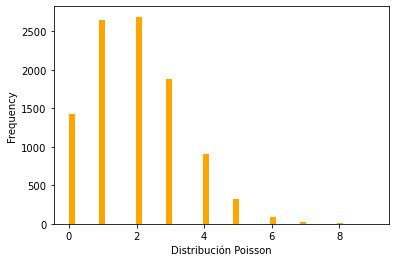

In [6]:
ax = sns.distplot(data_poisson,
                  kde=False, #notar que aquí interesa la frecuencia
                  bins=50,
                  color='orange',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Distribución Poisson', ylabel='Frequency')

Ejemplo:
Sea $X_{n}$ una variable aleatoria que se distribuye como una bernoulli$(.27)$, entonces $E(X_{n})=.27$ y $Var(X_{n})=.1971$,
para $1500$ variables aleatorias independientes e identicamente distribuidad aplicando la ley fuerte para $\epsilon > 0$:
$$P(|\frac{\sum _{i=1}^{1500}X_{i}}{1500}-.27|\geq \epsilon) \leq \frac{.1971}{1500\epsilon^2}$$
para un intervalo de $90\%$, $\frac{.1971}{1500\epsilon^2}=.1$, $\epsilon=.036$. Entonces se concluye que el error es menor que $3.7\%$ para un intervalo de $90\%$. Las interpretaciones pueden ser diferentes de acuerdo a lo que se refiera $p$. Notar que en este ejemplo se utilizó para buscar una cota superior. 

Gráficamente:

In [23]:
from scipy.stats import binom

In [31]:
data_binomial=binom.rvs(n=1500,p=.27,size=1000)

C:\Users\kevin\Dropbox\Python 3.9\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Distribución binomial'), Text(0, 0.5, 'Frecuencia')]

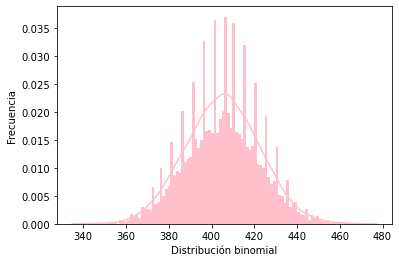

In [32]:
ax = sns.distplot(data_binomialll,
                  kde=True,
                  bins=100,
                  color='pink',
                  hist_kws={"linewidth": 10,'alpha':1})
ax.set(xlabel='Distribución binomial', ylabel='Frecuencia')

In [40]:
(binom(1500,.27).mean())/1500, bernoulli(.27).mean()

(0.27, 0.27)

La gráfica se parece a la de una distribución normal no estandarizada, tiene sentido porque solamente se graficó la distribución de la sucesión. Aun así, esta distribución se puede llevar a una normal estandar aplicando el *teorema central del límite*. Lo que concierne a la ley debil de los grandes número se cumple: la convergencia de las sucesiones coincide con el parámetro (media en este caso) de cada variable.

### Ley fuerte de los grandes números
Sean $X_{1}, X_{2}, \dots$ variables aleatorias independientes e idénticamente distribuidas con media $\mu$, entonces $$\frac{1}{n}\sum _{i=1}^{n} X_{i} \rightarrow^{cs} \mu$$
La convergencia casi segura implica la convergencia en probabilidad, de ahí proviene que esta ley es más fuerte.

Ejemplo: Sea $X_{n}$ una sucesión de variables aleatorias independientes e identicamente distribuidas con bernoulli$(\frac{1}{m})^N$, para cada $X_{n}$, $E(X_{n})= (\frac{1}{m})^N$ y $P(\lim _{n \to \infty}\frac{1}{n}\sum_{k=1}^{n}X_{k}= (\frac{1}{m})^N)=1$. Lo cual quiere decir que cada variable al menos ocurre, es decir, que cada variable es $1$ , (ocurre o no ocurre) por seguir una distribución bernoulli. Entonces para todos los eventos salvo quizá algunos, que marquen $0$ (no ocurren), la probabilidad es casi seguramente 1. Por lo tanto cada variable tiene media $p$ y la $\frac{1}{n}\sum_{k=1}^{n}X_{i}$ también tiene media $p$ casi seguramente. Notar que esta distribución con el parámetro, bajo las mismas condiciones, cumple la ley debil de los grandes números.


### Teorema central del límite 
Sea $X_{1},X_{2} \dots$ una sucesión de variables aleatorias identicamente distribuidas con $E(X_{n})=\mu$ y $Var(X_{n})=\sigma^2 < \infty$, entonces

$$\frac{X_{1}+\dots + X_{n}-n\mu}{\sqrt n\sigma} \rightarrow ^{D} N(0,1)$$
Equivalentemente: $$\frac{\sqrt{n}}{\sigma}(\overline{X}-\mu) \rightarrow ^{D} N(0,1)$$

Ejemplo: Sea $X_{n}$ una sucesión de variables aleatorias identicamente distribuidas con Exponencial$(1)$, verificar el teorema central del límite.
Con $Y=\sum_{i=1}^{n}X_{i}$. $E(Y)=n$ y $Var(Y)=n$. Si $n=1000$, entonces $$\frac{X_{1}+\dots + X_{1000}-1000}{\sqrt 1000} \rightarrow ^{D} N(0,1)$$

Gráficamente:

In [48]:
from scipy.stats import gamma

In [59]:
data_gamma=gamma.rvs(a=1000,size=1000) #notar qué parámetros acepta la función


C:\Users\kevin\Dropbox\Python 3.9\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Distribución gamma'), Text(0, 0.5, 'Frequency')]

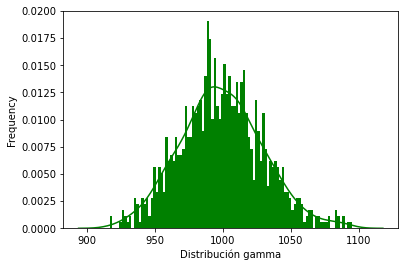

In [60]:
ax=sns.distplot(data_gamma,
                  kde=True,
                  bins=100,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Distribución gamma', ylabel='Frequency')

In [72]:
gamma(1000).cdf(1000), norm(0,1).cdf(0), gamma(1000).cdf(1000)

(0.5042052441802155, 0.5, 0.5042052441802155)

La gráfica parece que proviene de una distribución normal sin normalizar. Si por ejemplo, buscamos la media, recordar que la media de una gamma$(1000)$ es $1000$ (usar notación uniparametral), se tiene que 
$P({n\overline{X}}\leq 1000)$=
$P(\frac{n\overline{X}-1000}{\sqrt{1000}}\leq \frac{1000-1000}{1000})= P(Z\leq 0) \approx 0.50$. De esta forma la aproximación se cumple.